# Klasse D  Versterkers

<a href="./slides/Klasse-D.slides.html">![sildes](https://img.shields.io/badge/slides-beschikbaar-blue)</a> 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from  matplotlib import patches
import scipy.signal as signal
import numpy as np
from PySpice.Probe.Plot import plot
from PySpice.Spice.Parser import SpiceParser
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import schemdraw as schem
import schemdraw.elements as e
from ipywidgets import interact,FloatSlider
usewidgets=True;
    
def spicelisting(filename):
    with open(filename) as f:
        for line in f:
            print(line.strip())
    print()

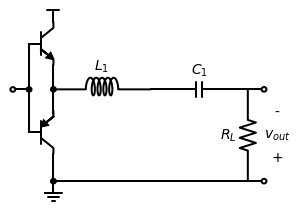

In [37]:
d = schem.Drawing()
T1 = d.add(e.BJT_NPN)
d.add(e.LINE, xy=T1.base, d='down', l=1.5)
indot=d.add(e.DOT)
d.add(e.LINE, d='down', l=1.4)
T2 = d.add(e.BJT_PNP, d='right')
d.add(e.VDD, xy=T1.collector,  l=0.75)
d.add(e.LINE, xy=indot.start, d='left', l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE, d='down',xy=T1.emitter, l=0.8)
d.add(e.DOT)
L1 = d.add(e.INDUCTOR2, d='right', label='$L_1$')
d.add(e.LINE, d='down',xy=L1.start, l=0.8)
C1 = d.add(e.CAP, d='right',xy=L1.end, label='$C_1$')
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=L1.start)
d.add(e.DOT)
d.add(e.GND)
d.add(e.LINE,d='up',toy=T2.collector)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['-','$v_{out}$','$+$'],lblofst=0.4)
d.draw()

```{figure} ./images/mpl.svg
---
name: dfig1
---
Basisschema van de klasse D versterker
```

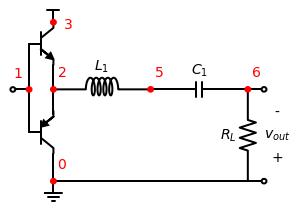

In [36]:
d = schem.Drawing()
T1 = d.add(e.BJT_NPN)
d.add(e.LINE, xy=T1.base, d='down', l=1.5)
indot=d.add(e.DOT,color='red')
indot.add_label('1',  loc='center', ofst=[-0.2,.3], align=('right','bottom'))
d.add(e.LINE, d='down', l=1.4)
T2 = d.add(e.BJT_PNP, d='right')
d.add(e.VDD, xy=T1.collector,  l=0.75)
vdd=d.add(e.DOT,color='red')
vdd.add_label('3',  loc='center', ofst=[0.6,-0.3], align=('right','bottom'))
d.add(e.LINE, xy=indot.start, d='left', l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE, d='down',xy=T1.emitter, l=0.8)
pwm=d.add(e.DOT,color='red')
pwm.add_label('2',  loc='center', ofst=[0.4,.3], align=('right','bottom'))
L1 = d.add(e.INDUCTOR2, d='right', label='$L_1$')
mid=d.add(e.DOT,color='red')
mid.add_label('5',  loc='center', ofst=[0.4,.3], align=('right','bottom'))
d.add(e.LINE, d='down',xy=L1.start, l=0.8)
C1 = d.add(e.CAP, d='right',xy=L1.end, label='$C_1$')
out=d.add(e.DOT,color='red')
out.add_label('6',  loc='center', ofst=[0.4,.3], align=('right','bottom'))
R = d.add(e.RES, d='down', label='$R_L$')
d.add(e.LINE, xy=R.start, d='right', l=0.5)
dot=d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='right',l=0.5)
d.add(e.DOT_OPEN)
d.add(e.LINE,xy=R.end, d='left', tox=L1.start)
gg=d.add(e.DOT,color='red')
gg.add_label('0',  loc='center', ofst=[0.4,.3], align=('right','bottom'))
d.add(e.GND)
d.add(e.LINE,d='up',toy=T2.collector)
d.add(e.GAP_LABEL, d='down', xy= dot.start, toy= R.end, label=['-','$v_{out}$','$+$'],lblofst=0.4)
d.draw()

```{figure} ./images/mpl.svg
---
name: dfig2
---
Basisschema van de klasse D versterker, met nummering van de knopen overeenkomende met de onderstaande SPICE file
```

De overeenkomende SPICE code voor dit circuit is:


In [4]:
spicelisting('simul\classD.sp')

* Class D amp 1
Q_Q1         3 1 2 Q2
Q_Qp         0 1 2 Qp
L_L1         5 2 1uH
C_C1         5 6 10n
R_RL         6 0 6
V_Vdd        3 0 20V
R_Rin        4 1 1
V_Vin        4 0 PULSE(0 20 0 20ns 20ns 294ns 628ns) DC=0
.model Q2  NPN(Is=14.34f BF=200)
.model Qp  PNP(Is=5.34f BF=100)



<p class=spicecaption>basiscircuit van de Klasse D versterker</p>

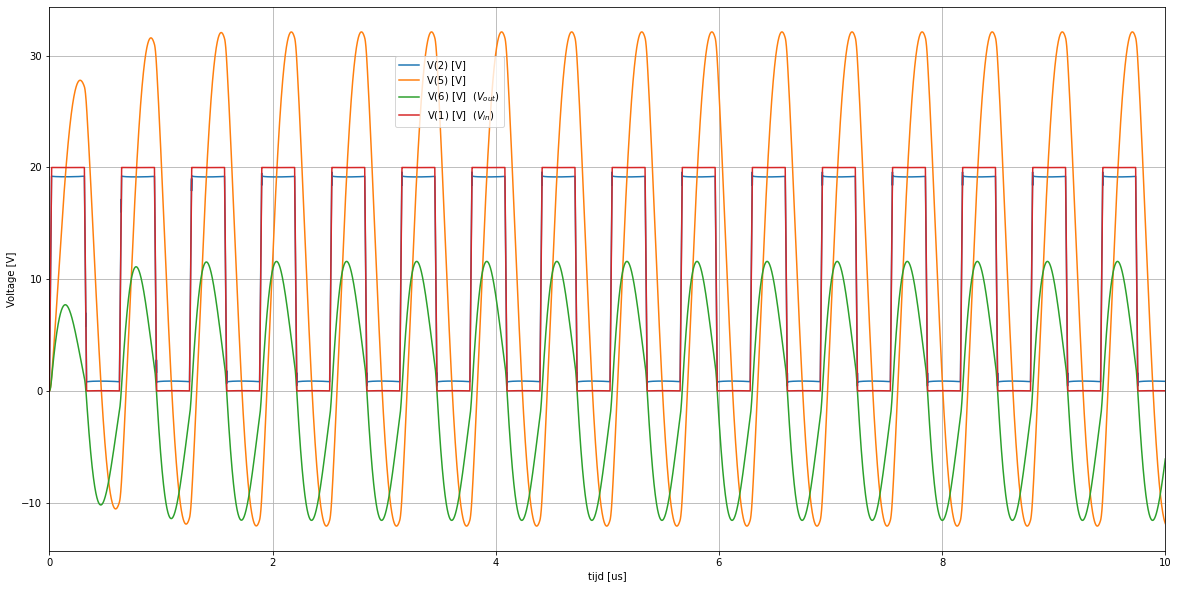

In [96]:
# .print TRAN IC(Q_Q1) IC(Q_Qp) I(R_RL)

circuit=SpiceParser(path='simul\classD.sp').build_circuit()  
end_time=1e-5
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
#simulator.save('2 1 5 6')  # dit mag niet langer zijn dan 15 tekens "v(1) v(2) v(5) v(6)" kan niet maar wel de 3 eerste
analysis = simulator.transient(step_time=2e-10, end_time=end_time)
figure, ax = plt.subplots(figsize=(20, 10))
ax.plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]')
ax.plot(analysis.time*1e6,analysis.nodes['5'],label='V(5) [V]' )
ax.plot(analysis.time*1e6,analysis.nodes['6'],label='V(6) [V]  ($V_{out}$)' )
ax.plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{in}$)')
ax.grid()
ax.legend( loc=(0.31,.78))
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Voltage [V]')
plt.show()

```{figure} ./images/mpl.svg
---
name: dfig5
---
Bekomen spanningen op de verschillende knopen in het hierboven aangegeven schema van de Klasse D versterker.
```

We merken op dat de spanning aan knoop 5 een veel grotere swing heeft dan de uitgangspanning over $R_L$ (i.e. knoop 6). De spanning op knoop 2 is typisch de verzadigingsspanning van Q1 lager dan de voedingsspanning (hier 20V) of de verzadigingsspanning van Qp hoger dan de grond. 

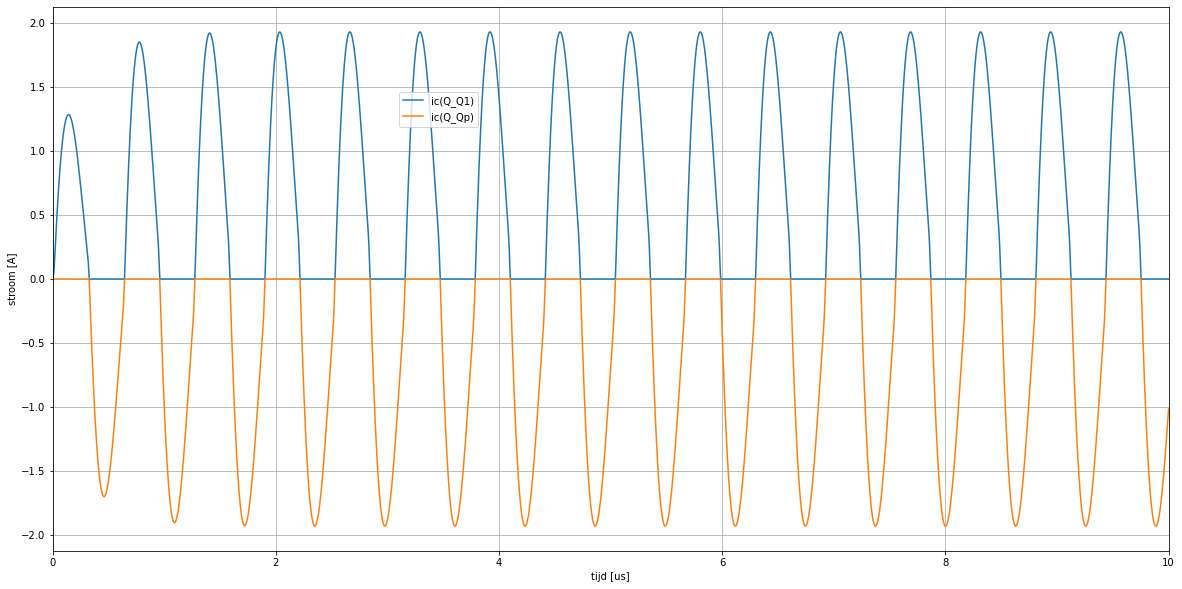

In [99]:
circuit=SpiceParser(path='simul\classD.sp').build_circuit()  
end_time=1e-5
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

#simulator.save("@Q_Q1[ie]")

analysis = simulator.transient(step_time=2e-10, end_time=end_time)
figure, ax = plt.subplots(figsize=(20, 10))
#ax.plot(analysis.time*1e6,-analysis.branches['Q_Q1[ie]']*201/200,label='ic(Q_Q1)' )
ax.plot(analysis.time*1e6,-analysis.branches['v_vdd']*201/200,label= 'ic(Q_Q1)')
ax.plot(analysis.time*1e6,analysis.branches['v_vdd']*201/200-analysis.branches['l_l1'],label= 'ic(Q_Qp)')
ax.grid()
ax.legend( loc=(0.31,.78))
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('stroom [A]')
plt.show()

```{figure} ./images/mpl.svg
---
name: dfig6
---
Stromen in de NPN en de PNP transistor van het hierboven aangegeven schema van de Klasse D versterker.
```

## simulatie met aansturing off frequency

Alleen tijdens het opstarten is kort deze spanning 0.7 V hoger dan voedingsspanning of 0.7V lager dan de grond. Merk op in de onderstaande figuur dat de stromen op deze momenten ook het ander teken hebben.